In [1]:
import os 
os.chdir("/workspaces/p99-bluesky/tests/")

import asyncio
import subprocess, os
from bluesky.run_engine import RunEngine
from ophyd_async.core import DeviceCollector
from ophyd_async.epics.signal import epics_signal_r, epics_signal_rw
from ophyd_async.core.signal import observe_value, wait_for_value
from p99_bluesky.devices.p99.sample_stage import (
    FilterMotor,
    SampleAngleStage,
    p99StageSelections,
)
from soft_motor import SoftThreeAxisStage
from bluesky.run_engine import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
from ophyd.sim import det
bec = BestEffortCallback()
RE = RunEngine({})

In [2]:
with DeviceCollector(mock=False):
    mock_sampleAngleStage = SampleAngleStage(
        "p99-MO-TABLE-01:", name="mock_sampleAngleStage"
    )
    mock_filter_wheel = FilterMotor(
        "p99-MO-STAGE-02:MP:SELECT", name="mock_filter_wheel"
    )
    xyz_motor = SoftThreeAxisStage("p99-MO-STAGE-02:", name="xyz_motor")

CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XLLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Fri Jun 14 2024 12:44:29.470848612
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XHLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Fri Jun 14 2024 12:44:29.470855933
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XSTOP", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Fri Jun 14 2024 12:44:29.47085857



Transient Scan ID: 11     Time: 2024-06-14 13:09:16
Persistent Unique Scan ID: '1b1e89d7-e6c3-4227-b21c-ce22e6220f7e'
New stream: 'primary'
+-----------+------------+-------------+-------------+-------------+-----------------------------+------------+
|   seq_num |       time | xyz_motor-y | xyz_motor-z | xyz_motor-x | mock_sampleAngleStage-theta |        det |
+-----------+------------+-------------+-------------+-------------+-----------------------------+------------+
|         1 | 13:09:36.5 |      -1.000 |       1.000 |       1.000 |                      -1.000 |      1.000 |
|         2 | 13:09:38.9 |      -0.556 |       0.667 |       0.700 |                      -0.778 |      1.000 |
|         3 | 13:09:41.2 |      -0.111 |       0.333 |       0.400 |                      -0.556 |      1.000 |
|         4 | 13:09:43.5 |       0.333 |       0.000 |       0.100 |                      -0.333 |      1.000 |
|         5 | 13:09:45.8 |       0.778 |      -0.333 |      -0.200 |      

('1b1e89d7-e6c3-4227-b21c-ce22e6220f7e',)

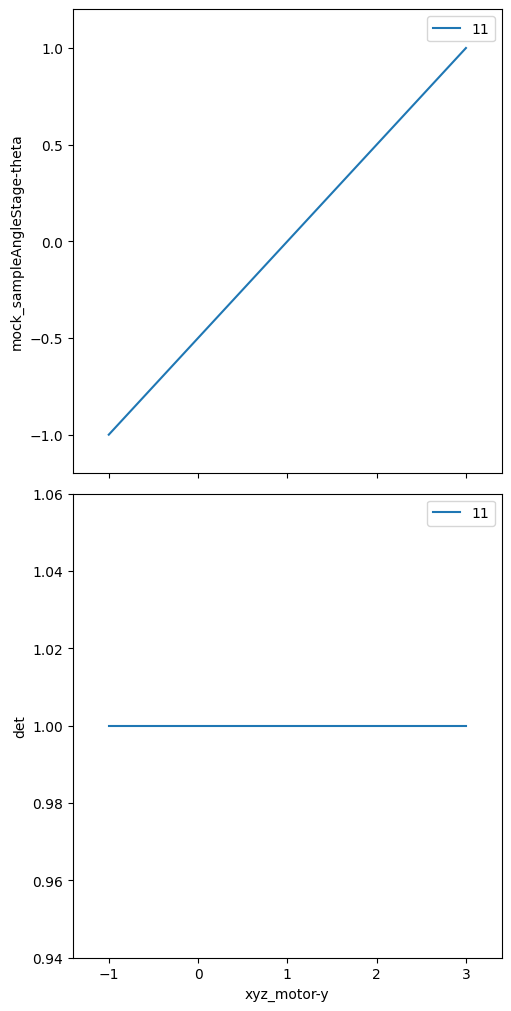

CA.Client.Exception...............................................
    Context: "host.containers.internal:5064"
    Source File: modules/ca/src/client/cac.cpp line 1237
    Current Time: Fri Jun 14 2024 13:11:17.186318048
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XLLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Fri Jun 14 2024 13:11:55.045121328
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XHLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Fri Jun 14 2024 13:11:55.045127366
..................................................................

In [17]:
from collections import defaultdict
docs = defaultdict(list)
def capture_emitted(name, doc):
        docs[name].append(doc)

RE(scan([det],mock_sampleAngleStage.theta, -1,1, xyz_motor.y, -1, 3, xyz_motor.z,1, -2,xyz_motor.x, 1,-1.7,num = 10),[bec,capture_emitted])

In [14]:
docs

defaultdict(list,
            {'start': [{'uid': '33783bdd-412a-4dee-992c-b5b2eb19dafe',
               'time': 1718370225.951389,
               'versions': {'ophyd': '1.9.0', 'bluesky': '1.13.0a3'},
               'scan_id': 9,
               'plan_type': 'generator',
               'plan_name': 'scan',
               'detectors': ['mock_sampleAngleStage-theta', 'det'],
               'motors': ('xyz_motor-y', 'xyz_motor-z', 'xyz_motor-x'),
               'num_points': 10,
               'num_intervals': 9,
               'plan_args': {'detectors': ['<ophyd_async.core.signal.SignalRW object at 0x7f1486beba90>',
                 "SynGauss(prefix='', name='det', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])"],
                'num': 10,
                'args': ['<soft_motor.SoftMotor object at 0x7f1486bee710>',
                 -1,
                 3,
                 '<soft_motor.SoftMotor object at 0x7f1486beff10>',
                



Transient Scan ID: 6     Time: 2024-06-14 12:51:47
Persistent Unique Scan ID: '72b465ad-6f6b-4faf-9828-3958e41e7c1b'
New stream: 'primary'
+-----------+------------+-------------+-------------+-------------+-----------------------------+------------+
|   seq_num |       time | xyz_motor-y | xyz_motor-z | xyz_motor-x | mock_sampleAngleStage-theta |        det |
+-----------+------------+-------------+-------------+-------------+-----------------------------+------------+
|         1 | 12:51:47.8 |       3.000 |      -2.000 |      -1.700 |                       0.000 |      1.000 |
|         2 | 12:51:48.4 |       2.897 |      -1.923 |      -1.631 |                       0.000 |      1.000 |
|         3 | 12:51:49.0 |       2.795 |      -1.846 |      -1.562 |                       0.000 |      1.000 |
|         4 | 12:51:49.6 |       2.692 |      -1.769 |      -1.492 |                       0.000 |      1.000 |
|         5 | 12:51:50.2 |       2.590 |      -1.692 |      -1.423 |       

('72b465ad-6f6b-4faf-9828-3958e41e7c1b',)

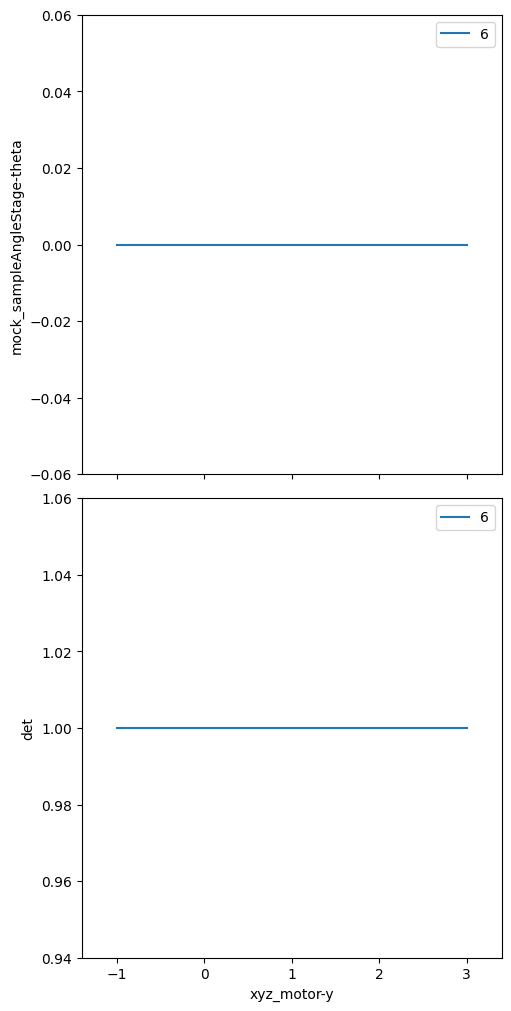

In [8]:
RE(scan([mock_sampleAngleStage.theta, det], xyz_motor.y, 3, -1, xyz_motor.z,-2, 1,xyz_motor.x, -1.7,1,num = 40),bec)

In [ ]:
result = asyncio.gather(xyz_motor.y.user_setpoint.set(-3),xyz_motor.z.user_setpoint.set(3))

In [ ]:
result = asyncio.gather(xyz_motor.z.user_readback.get_value(),xyz_motor.y.user_readback.get_value(),xyz_motor.x.user_readback.get_value())

In [ ]:
result

In [ ]:
result = asyncio.gather(wait_for_value(xyz_motor.z.motor_done_move,True, timeout = None))

In [ ]:
result